In [17]:
#import library penting
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [18]:
#load dataset
data = pd.read_csv('bank_customer_churn_dataset.csv')
data

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [19]:
#cek jumlah data dan kolomnya
data.shape

(10000, 12)

## STEP EDA

In [20]:
#Cek data kosong
data.isnull().values.any()

False

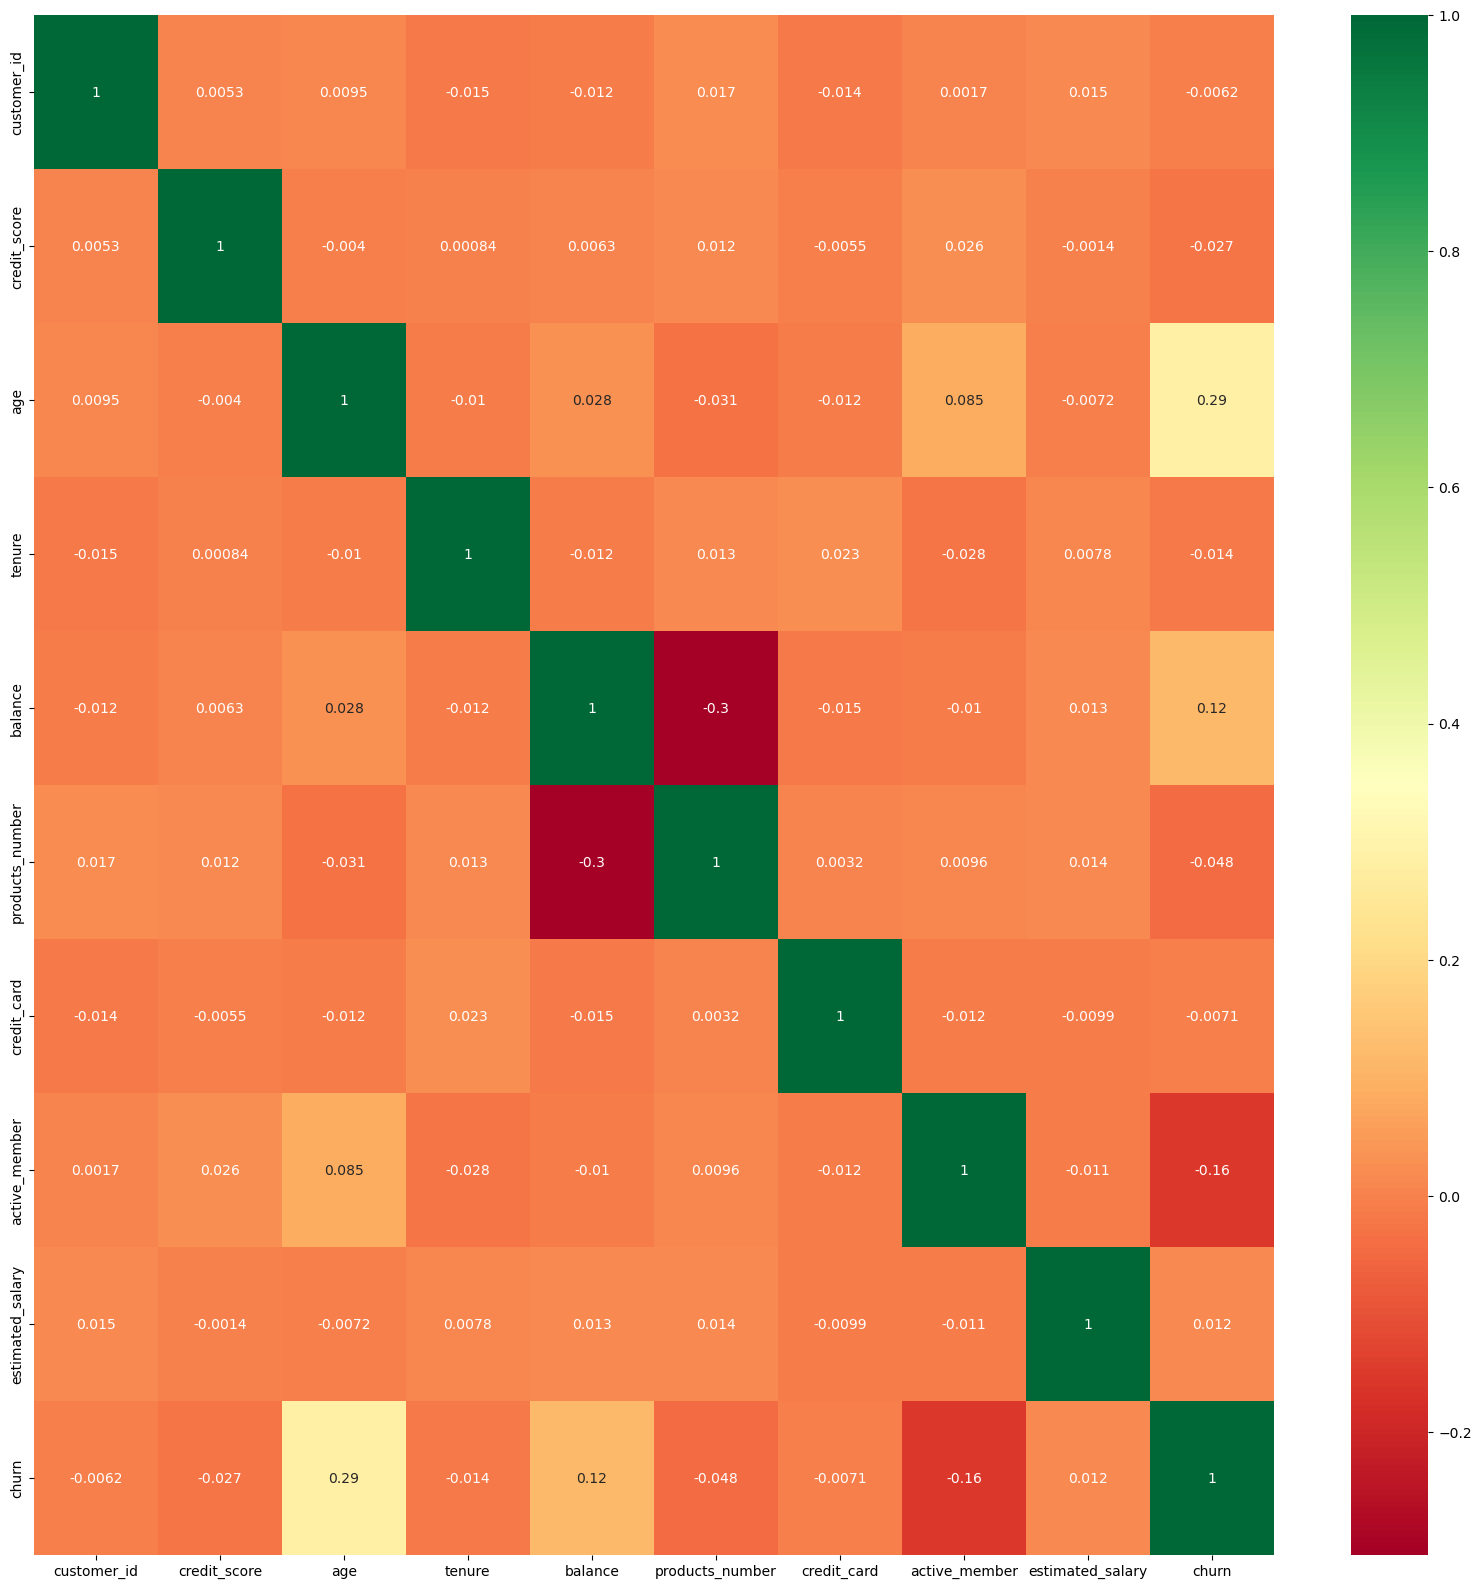

In [21]:
#Korelasi menggunakan heatmap
import seaborn as sns

numeric_data = data.select_dtypes(include=[np.number])

korelasi = numeric_data.corr()

#plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(korelasi, annot=True, cmap="RdYlGn")
plt.show()

In [22]:
#Show corelations in tables
numeric_data.corr()

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

In [23]:
#Statistika dasar
data.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [24]:
#checking skewness dari data
bankcustomer_true_count = len(data.loc[data['churn']==1])
bankcustomer_false_count = len(data.loc[data['churn']==0])

In [25]:
#view
(bankcustomer_true_count,bankcustomer_false_count)

(2037, 7963)

In [26]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 12


In [27]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [28]:
print('Banyak baris nilai nol untuk customer_id : {0}'.format(len(data.loc[data["customer_id"]==0])))
print('Banyak baris nilai nol untuk credit_score : {0}'.format(len(data.loc[data["credit_score"]==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data.loc[data["age"]==0])))
print('Banyak baris nilai nol untuk tenure : {0}'.format(len(data.loc[data["tenure"]==0])))
print('Banyak baris nilai nol untuk balance : {0}'.format(len(data.loc[data["balance"]==0])))
print('Banyak baris nilai nol untuk products_number : {0}'.format(len(data.loc[data["products_number"]==0])))
print('Banyak baris nilai nol untuk credit_card : {0}'.format(len(data.loc[data["credit_card"]==0])))
print('Banyak baris nilai nol untuk active_member : {0}'.format(len(data.loc[data["active_member"]==0])))
print('Banyak baris nilai nol untuk estimated_salary : {0}'.format(len(data.loc[data["estimated_salary"]==0])))

Banyak baris nilai nol untuk customer_id : 0
Banyak baris nilai nol untuk credit_score : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk tenure : 413
Banyak baris nilai nol untuk balance : 3617
Banyak baris nilai nol untuk products_number : 0
Banyak baris nilai nol untuk credit_card : 2945
Banyak baris nilai nol untuk active_member : 4849
Banyak baris nilai nol untuk estimated_salary : 0


In [29]:
data2 = data.copy()

In [30]:
#rata-rata setiap features (merubah nilai 0 menjadi nilai rata-rata dari semua kolom)
avg_tenure = data2['tenure'].mean()
avg_balance = data2['balance'].mean()
avg_credit_card = data2['credit_card'].mean()
avg_active_member = data2['active_member'].mean()

In [31]:
#now replace avg to columns
data2['tenure'].replace({0:avg_tenure},inplace=True)
data2['balance'].replace({0:avg_balance},inplace=True)
data2['credit_card'].replace({0:avg_credit_card},inplace=True)
data2['active_member'].replace({0:avg_active_member},inplace=True)

In [32]:
#double check
print('Banyak baris nilai nol untuk customer_id : {0}'.format(len(data2.loc[data2["customer_id"]==0])))
print('Banyak baris nilai nol untuk credit_score : {0}'.format(len(data2.loc[data2["credit_score"]==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data2.loc[data2["age"]==0])))
print('Banyak baris nilai nol untuk tenure : {0}'.format(len(data2.loc[data2["tenure"]==0])))
print('Banyak baris nilai nol untuk balance : {0}'.format(len(data2.loc[data2["balance"]==0])))
print('Banyak baris nilai nol untuk products_number : {0}'.format(len(data2.loc[data2["products_number"]==0])))
print('Banyak baris nilai nol untuk credit_card : {0}'.format(len(data2.loc[data2["credit_card"]==0])))
print('Banyak baris nilai nol untuk active_member : {0}'.format(len(data2.loc[data2["active_member"]==0])))
print('Banyak baris nilai nol untuk estimated_salary : {0}'.format(len(data2.loc[data2["estimated_salary"]==0])))

Banyak baris nilai nol untuk customer_id : 0
Banyak baris nilai nol untuk credit_score : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk tenure : 0
Banyak baris nilai nol untuk balance : 0
Banyak baris nilai nol untuk products_number : 0
Banyak baris nilai nol untuk credit_card : 0
Banyak baris nilai nol untuk active_member : 0
Banyak baris nilai nol untuk estimated_salary : 0


In [33]:
#make pairplot
sns.pairplot(data2,hue='churn',palette='magma',height=3.5)
plt.tight_layout()

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16244\1371596917.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


C:\Users\Dell\AppData\Local\Temp\ipykernel_16244\2918154438.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


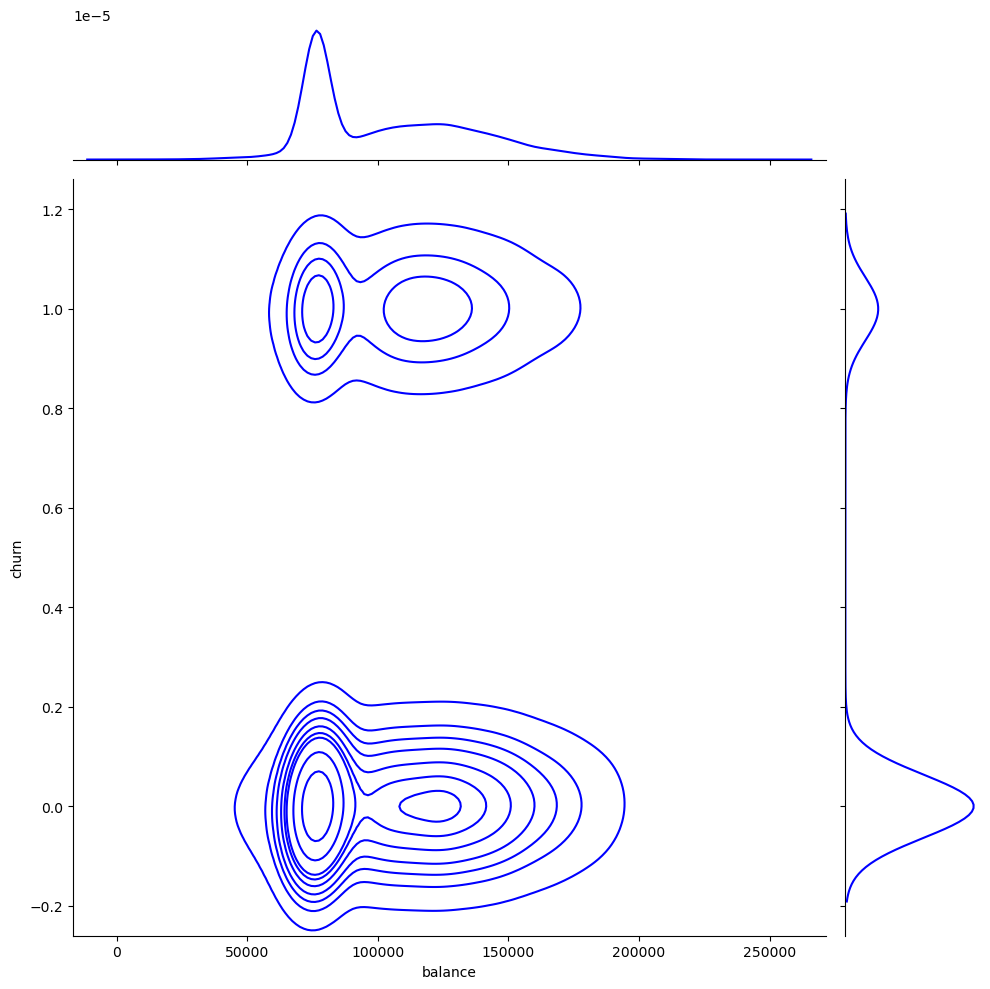

In [34]:
#jointplot
sns.jointplot(x='balance', y='churn',data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

## Apply Model

In [35]:
from sklearn.model_selection import train_test_split

X = data2.drop('churn',axis=1)
y = data2['churn']

In [36]:
X

customer_id  credit_score  country  gender  age  tenure        balance  \
0        15634602           619   France  Female   42     2.0   76485.889288   
1        15647311           608    Spain  Female   41     1.0   83807.860000   
2        15619304           502   France  Female   42     8.0  159660.800000   
3        15701354           699   France  Female   39     1.0   76485.889288   
4        15737888           850    Spain  Female   43     2.0  125510.820000   
...           ...           ...      ...     ...  ...     ...            ...   
9995     15606229           771   France    Male   39     5.0   76485.889288   
9996     15569892           516   France    Male   35    10.0   57369.610000   
9997     15584532           709   France  Female   36     7.0   76485.889288   
9998     15682355           772  Germany    Male   42     3.0   75075.310000   
9999     15628319           792   France  Female   28     4.0  130142.790000   

      products_number  credit_card  active_member  estimated_salary  
0                   1       1.0000         1.0000         101348.88  
1                   1       0.7055         1.0000         112542.58  
2                   3       1.0000         0.5151         113931.57  
3                   2       0.7055         0.5151          93826.63  
4                   1       1.0000         1.0000          79084.10  
...               ...          ...            ...               ...  
9995                2       1.0000         0.5151          96270.64  
9996                1       1.0000         1.0000         101699.77  
9997                1       0.7055         1.0000          42085.58  
9998                2       1.0000         0.5151          92888.52  
9999                1       1.0000         0.5151          38190.78  

[10000 rows x 11 columns]

In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
X_train

customer_id  credit_score  country  gender  age  tenure        balance  \
9254     15601116           686   France    Male   32     6.0   76485.889288   
1561     15766374           632  Germany    Male   42     4.0  119624.600000   
1670     15716994           559    Spain    Male   24     3.0  114739.920000   
6087     15730759           561   France  Female   27     9.0  135637.000000   
6669     15797900           517   France    Male   56     9.0  142147.320000   
...           ...           ...      ...     ...  ...     ...            ...   
5734     15596647           768   France    Male   54     8.0   69712.740000   
5191     15681075           682   France  Female   58     1.0   76485.889288   
5390     15573851           735   France  Female   38     1.0   76485.889288   
860      15807663           667   France    Male   43     8.0  190227.460000   
7270     15706268           697  Germany    Male   51     1.0  147910.300000   

      products_number  credit_card  active_member  estimated_salary  
9254                2       1.0000         1.0000         179093.26  
1561                2       1.0000         1.0000         195978.86  
1670                1       1.0000         0.5151          85891.02  
6087                1       1.0000         0.5151         153080.40  
6669                1       0.7055         0.5151          39488.04  
...               ...          ...            ...               ...  
5734                1       1.0000         1.0000          69381.05  
5191                1       1.0000         1.0000            706.50  
5390                3       0.7055         0.5151          92220.12  
860                 1       1.0000         0.5151          97508.04  
7270                1       1.0000         1.0000          53581.14  

[8000 rows x 11 columns]

In [40]:
X_train.shape

(8000, 11)

In [41]:
y_train.shape

(8000,)

In [42]:
X_test

customer_id  credit_score  country  gender  age  tenure        balance  \
6252     15687492           596  Germany    Male   32     3.0   96709.070000   
4684     15736963           623   France    Male   43     1.0   76485.889288   
1731     15721730           601    Spain  Female   44     4.0   76485.889288   
4742     15762134           506  Germany    Male   59     8.0  119152.100000   
4521     15648898           560    Spain  Female   27     7.0  124995.980000   
...           ...           ...      ...     ...  ...     ...            ...   
6412     15598982           602  Germany  Female   53     5.0   98268.840000   
8285     15572631           609   France    Male   25    10.0   76485.889288   
7853     15746674           730   France  Female   47     7.0   76485.889288   
1095     15689081           692   France    Male   29     4.0   76485.889288   
6929     15651627           628  Germany    Male   39     1.0  115341.190000   

      products_number  credit_card  active_member  estimated_salary  
6252                2       0.7055         0.5151          41788.37  
4684                2       1.0000         1.0000         146379.30  
1731                2       1.0000         0.5151          58561.31  
4742                2       1.0000         1.0000         170679.74  
4521                1       1.0000         1.0000         114669.79  
...               ...          ...            ...               ...  
6412                1       0.7055         1.0000          45038.29  
8285                1       0.7055         1.0000         109895.16  
7853                1       1.0000         0.5151          33373.26  
1095                1       1.0000         0.5151          76755.99  
6929                1       1.0000         1.0000         107674.30  

[2000 rows x 11 columns]

In [43]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 8000, dtype: int64

## Training Model

In [44]:
from sklearn.svm import SVC

SVC_model = SVC()

In [45]:
from sklearn.naive_bayes import GaussianNB
import pickle

# Assuming naive_bayes_model is an instance of MultinomialNB
naive_bayes_model = GaussianNB()

# Train your model before saving it, if you haven't already

# Save the Naive Bayes model to a file
with open('NaiveBayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)


In [46]:
x_train_encoded = pd.get_dummies(X_train)

SVC_model.fit(x_train_encoded,y_train)

SVC()

In [47]:
x_test_encoded = pd.get_dummies(X_test)

x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

svc_prediction = SVC_model.predict(x_test_encoded)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_prediction))

[[1607    0]
 [ 393    0]]


In [49]:
#menghitung akurasi
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
clf = GaussianNB()

In [53]:
clf.fit(x_train_encoded, y_train)

GaussianNB()

In [54]:
y_pred = clf.predict(x_train_encoded)

In [55]:
accuracy = metrics.accuracy_score(y_train, y_pred)
precision = metrics.precision_score(y_train, y_pred, average='weighted')
recall = metrics.recall_score(y_train, y_pred, average='weighted')
f1_score = metrics.f1_score(y_train, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.778375
Precision: 0.698251165471604
Recall: 0.778375
F1 Score: 0.7155955989129775


## Save Model

In [56]:
import pickle

pickle.dump(SVC_model,open('SVC.pkl','wb'))

In [57]:
import pickle

pickle.dump(naive_bayes_model, open('NaiveBayes_model.pkl', 'wb'))